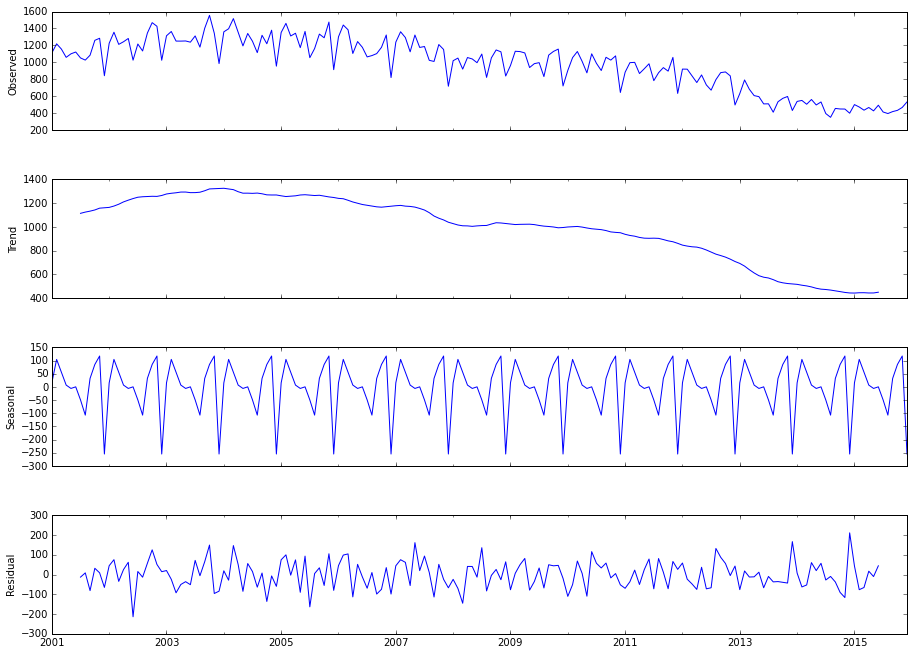

In [6]:
#http://michaelpaulschramm.com/simple-time-series-trend-analysis/

%matplotlib inline

import datetime as datetime  
import pandas as pd  
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pyodbc as pg

PG_DB = 'DRIVER={PostgreSQL ANSI(x64)};server=10.100.51.42;port=5432;database=reportingdb;uid=xxxxx;Pwd=xxxxx'

conn = pg.connect(PG_DB)

sSQL = """
            SELECT
                loaned_date,
                COUNT (1) AS vol
            FROM
                stm.loan_item lli
            WHERE
                loaned_date >= '20010101'
            GROUP BY
                loaned_date
            ORDER BY
                loaned_date;
        """

df = pd.read_sql(sSQL, conn)
df.index = pd.DatetimeIndex(df['loaned_date'])

df = df.drop(['loaned_date'],axis=1)
df = df.resample('M',how='mean')


flow = df['vol']

flow = flow['2001-01-01':]

res = sm.tsa.seasonal_decompose(flow)
fig = res.plot()
fig.set_size_inches(14,10)

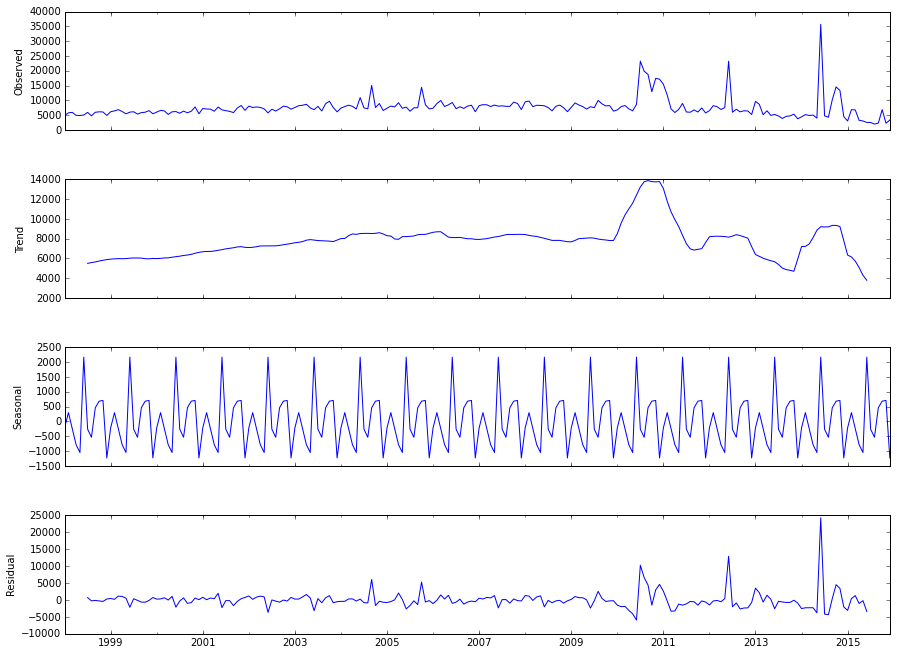

In [32]:
import datetime as datetime  
import pandas as pd  
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pyodbc as pg

PG_DB = 'DRIVER={PostgreSQL ANSI(x64)};server=10.100.51.42;port=5432;database=reportingdb;uid=xxxxx;Pwd=xxxxx'

conn = pg.connect(PG_DB)

sSQL = """
            SELECT
                date_time::date as movement_date,
                COUNT (1) AS vol
            FROM
               stm.movement_record
            WHERE
                date_time >= '19980101'
            GROUP BY
                date_time::date
            ORDER BY
                date_time::date;
        """

df = pd.read_sql(sSQL, conn)
df.index = pd.DatetimeIndex(df['movement_date'])

df = df.drop(['movement_date'],axis=1)
df = df.resample('M',how='mean')


flow = df['vol']

flow = flow['1987-01-01':]

res = sm.tsa.seasonal_decompose(flow)
fig = res.plot()
fig.set_size_inches(14,10)